In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def get_cate_features(data):
    cat_col=[]
    cols = [c for c in data.columns if 'f' in c]
    for col in cols:
        if train[col].dtype =='int64':
            cat_col.append(col)
    return cat_col

In [53]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [55]:
train.shape

(990006, 172)

In [62]:
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

In [63]:
y=train["label"].values
train.drop(["label","date"],axis=1,inplace=True)
test.drop(["label","date"],axis=1,inplace=True)

KeyError: 'label'

In [66]:
X=train
x_test=test

In [67]:
train_x,valid_x,train_y,valid_y=train_test_split(X,y,test_size=0.2,random_state=2018)
categorical_feature=get_cate_features(train)
features=train.columns.tolist()

In [72]:
clf=lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=1000,
    max_bin=255,
    objective=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=1,
    colsample_bytree=1.0,
    random_state=None, 
    n_jobs=-1,
    silent=True
)
clf.fit(train_x, train_y,
         eval_set=[(valid_x,valid_y)],
        eval_init_score=None, eval_metric='auc',
        early_stopping_rounds=100, verbose=True, feature_name=features,
        categorical_feature=categorical_feature, callbacks=None
        )

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f3', 'f4', 'f6', 'f7', 'f8', 'f9']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.913976
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.951484
[3]	valid_0's auc: 0.950283
[4]	valid_0's auc: 0.950406
[5]	valid_0's auc: 0.954821
[6]	valid_0's auc: 0.954541
[7]	valid_0's auc: 0.957878
[8]	valid_0's auc: 0.958955
[9]	valid_0's auc: 0.959545
[10]	valid_0's auc: 0.95964
[11]	valid_0's auc: 0.96229
[12]	valid_0's auc: 0.962618
[13]	valid_0's auc: 0.962652
[14]	valid_0's auc: 0.9647
[15]	valid_0's auc: 0.965432
[16]	valid_0's auc: 0.965623
[17]	valid_0's auc: 0.968667
[18]	valid_0's auc: 0.969401
[19]	valid_0's auc: 0.969803
[20]	valid_0's auc: 0.970359
[21]	valid_0's auc: 0.970618
[22]	valid_0's auc: 0.970754
[23]	valid_0's auc: 0.97201
[24]	valid_0's auc: 0.973268
[25]	valid_0's auc: 0.974216
[26]	valid_0's auc: 0.974371
[27]	valid_0's auc: 0.974598
[28]	valid_0's auc: 0.974974
[29]	valid_0's auc: 0.975331
[30]	valid_0's auc: 0.975533
[31]	valid_0's auc: 0.976637
[32]	valid_0's auc: 0.976896
[33]	valid_0's auc: 0.9

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [73]:
proba=clf.predict_proba(test)
submission=pd.read_csv("./sub_sample/submission.csv")
submission["score"]=proba[:,1]
submission.to_csv("submission.csv",index=False)

In [74]:
proba

array([[9.99793051e-01, 2.06948896e-04],
       [9.86249685e-01, 1.37503146e-02],
       [9.99520298e-01, 4.79702096e-04],
       ...,
       [9.99877146e-01, 1.22854367e-04],
       [9.99489933e-01, 5.10066933e-04],
       [9.99934370e-01, 6.56303017e-05]])

In [76]:
valid_proba=clf.predict_proba(valid_x)

In [78]:
from sklearn.metrics import roc_curve

In [79]:
fpr,tpr,thresholds=roc_curve(valid_y,valid_proba[:,1],pos_label=1)

In [83]:
%matplotlib inline 
import matplotlib.pyplot as plt

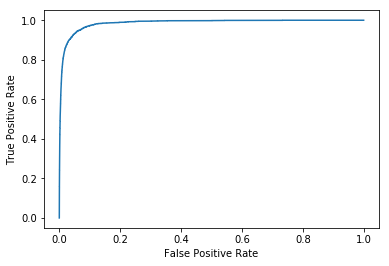

In [84]:
plt.plot(fpr,tpr)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [90]:
tpr

array([0., 0., 0., ..., 1., 1., 1.])

In [91]:
fpr

array([0.00000000e+00, 5.11216081e-06, 1.53364824e-05, ...,
       9.99575691e-01, 9.99984664e-01, 1.00000000e+00])

In [96]:
tpr[np.where(fpr>=0.005)[0][0]]

0.6246861924686192

In [98]:
score=0.4*tpr[np.where(fpr>=0.001)[0][0]]+\
        0.3*tpr[np.where(fpr>=0.005)[0][0]]+\
        0.3*tpr[np.where(fpr>=0.01)[0][0]]

In [99]:
score

0.5317991631799164